In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_yds_att_salary_18-19')

In [3]:
qbs.dtypes

NAME             object
YDS/ATT         float64
YDS/ATT_rank    float64
salary            int64
dtype: object

In [4]:
qbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary
0,Ryan Fitzpatrick,9.6,1.0,3300000
1,Patrick Mahomes,8.8,3.0,4106447
2,Philip Rivers,8.5,5.0,20812500
3,Jared Goff,8.4,6.0,6984418
4,Deshaun Watson,8.2,8.5,3463570


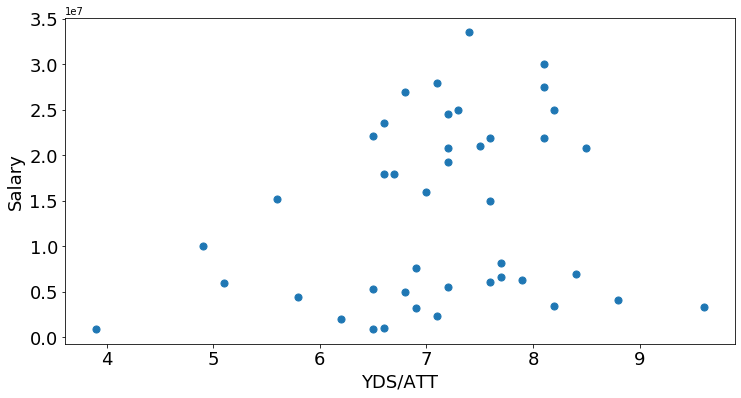

In [5]:
ax = qbs.plot(kind="scatter", x = 'YDS/ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['YDS/ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 1.17366434e-15, -8.98751972e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.44925686, -1.02259356],
       [-0.0564393 ,  0.8025045 ],
       [ 1.05597939, -0.82672999],
       [ 0.89399858,  1.31989531],
       [-2.13227692, -0.57866482]])

In [11]:
km.predict(X)

array([2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 4, 4, 4, 4],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary,clusters
0,Ryan Fitzpatrick,9.6,1.0,3300000,2
1,Patrick Mahomes,8.8,3.0,4106447,2
2,Philip Rivers,8.5,5.0,20812500,3
3,Jared Goff,8.4,6.0,6984418,2
4,Deshaun Watson,8.2,8.5,3463570,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.65000000e+00, 3.73635700e+06],
       [7.06428571e+00, 2.14348095e+07],
       [8.23750000e+00, 5.63569725e+06],
       [8.06666667e+00, 2.64520833e+07],
       [4.87500000e+00, 8.04125000e+06]])

In [14]:
qbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

,YDS/ATT,salary
clusters,,
0,6.650000,3.736357e+06
1,7.064286,2.143481e+07
2,8.237500,5.635697e+06
3,8.066667,2.645208e+07
4,4.875000,8.041250e+06


In [15]:
centroids = qbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

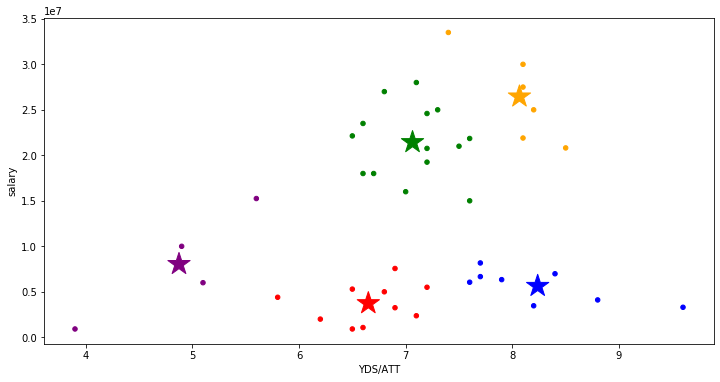

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

13.301349166853722

In [18]:
silhouette_score(X, km.labels_)

0.44657947664680414